# Phase-1: Data Exploration and Change Analysis

## Objective
The objective of this notebook is to explore paired satellite images (before and after) and 
identify significant changes that may represent intrusion events using simple image processing techniques.


## Dataset Assumptions
- Each before and after image pair corresponds to the same geographic location.
- Images are pre-aligned and have the same resolution.
- Changes observed between image pairs are treated as potential intrusion events for simulation purposes.


In [37]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [38]:
before_dir = "D:\\Projects\\ibs-ids-satellite-surveillance\\data\\raw\\before"
after_dir = "D:\\Projects\\ibs-ids-satellite-surveillance\\data\\raw\\after"

image_name = "00050.png"

before_path = os.path.join(before_dir, image_name)
after_path = os.path.join(after_dir, image_name)

In [39]:
before_img = cv2.imread(before_path)
after_img = cv2.imread(after_path)

before_img = cv2.cvtColor(before_img, cv2.COLOR_BGR2RGB)
after_img = cv2.cvtColor(after_img, cv2.COLOR_BGR2RGB)

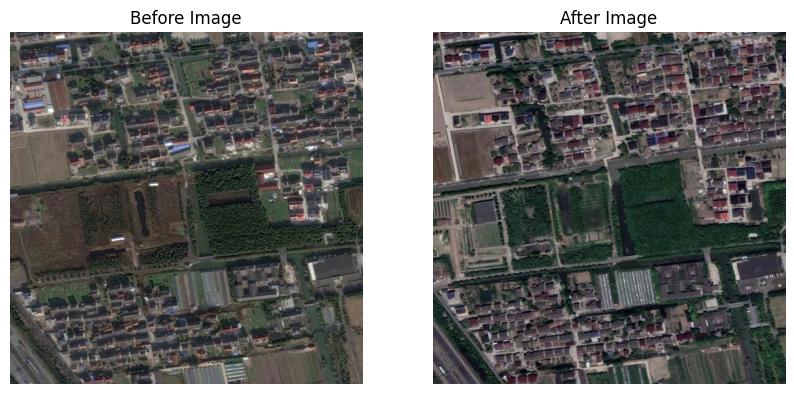

In [40]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(before_img)
plt.title("Before Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(after_img)
plt.title("After Image")
plt.axis("off")

plt.show()

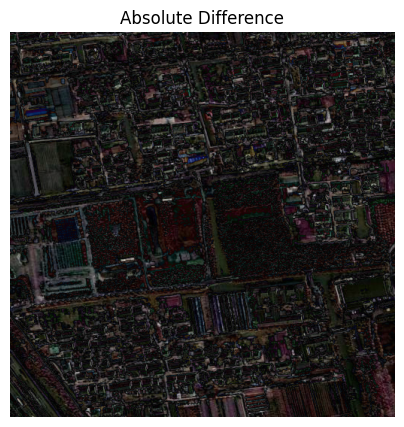

In [41]:
diff = cv2.absdiff(before_img, after_img)

plt.figure(figsize=(5,5))
plt.imshow(diff)
plt.title("Absolute Difference")
plt.axis("off")
plt.show()

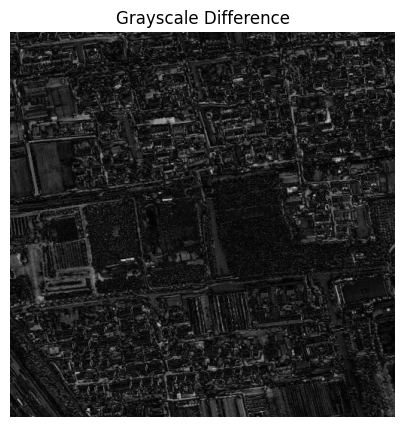

In [42]:
gray_diff = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(gray_diff, cmap="gray")
plt.title("Grayscale Difference")
plt.axis("off")
plt.show()

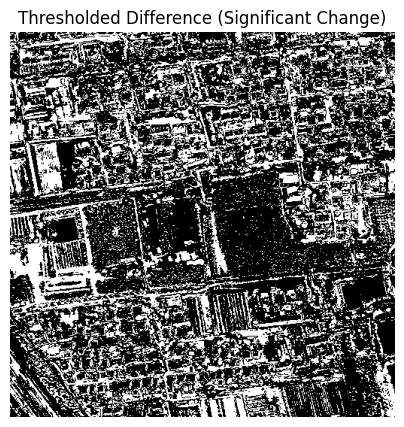

In [43]:
_, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded Difference (Significant Change)")
plt.axis("off")
plt.show()

### Threshold Selection
A fixed threshold value is used to suppress minor pixel-level variations caused by lighting or noise.
The threshold is chosen empirically for demonstration purposes and can be adjusted based on dataset characteristics.

In [44]:
total_pixels = thresh.shape[0] * thresh.shape[1]
changed_pixels = np.sum(thresh == 255)

intrusion_score = (changed_pixels / total_pixels) * 100

intrusion_score

np.float64(34.58290100097656)

In [45]:
THRESHOLD_PERCENT = 1.0  # adjustable

if intrusion_score > THRESHOLD_PERCENT:
    print("Intrusion Detected")
else:
    print("No Significant Intrusion")

Intrusion Detected


## Phase-1 Conclusion
This phase demonstrates that raw pixel-level differencing alone is insufficient for meaningful intrusion detection.
By applying basic preprocessing and thresholding, significant changes can be isolated and quantified.
The results validate the suitability of the dataset and approach for building a simplified intrusion-based detection system.